#                             Module End Exam -Machine Learning    seat no:220340325053
           



# Q2
Importing required libraries

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import data set

In [200]:
data=pd.read_csv("cosmetic.csv")

In [201]:
data.head()                 #to show first 5 observations


,ID,Age,Income,Gender,Marital status,Buys
0,1,<21,High,Male,Single,No
1,2,<21,High,Male,Married,No
2,3,21-35,High,Male,Single,Yes
3,4,>35,Medium,Male,Single,Yes
4,5,>35,Low,Female,Single,Yes


In [202]:
data.info()                     #to show info about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              14 non-null     int64 
 1   Age             14 non-null     object
 2   Income          14 non-null     object
 3   Gender          14 non-null     object
 4   Marital status  14 non-null     object
 5   Buys            14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [203]:
data=data.drop('ID',axis=1)                      #id column is not required so i will drop it
data.head()

,Age,Income,Gender,Marital status,Buys
0,<21,High,Male,Single,No
1,<21,High,Male,Married,No
2,21-35,High,Male,Single,Yes
3,>35,Medium,Male,Single,Yes
4,>35,Low,Female,Single,Yes


In [204]:
data.isnull().sum()                        # checking null values in the data set or not

Age               0
Income            0
Gender            0
Marital status    0
Buys              0
dtype: int64

# from above we can say that there is no null values in the data

In [205]:
data.shape                # to check numvber of column and rows in the data

(14, 5)

In [206]:
data.describe()                #check statistics about the data

,Age,Income,Gender,Marital status,Buys
count,14,14,14,14,14
unique,3,3,2,2,2
top,<21,Medium,Male,Single,Yes
freq,5,6,7,7,9


# count how many values in each group in variable

In [207]:
data['Income'].value_counts()                      # for income varible there are three group high,medium,low

Medium    6
High      4
Low       4
Name: Income, dtype: int64

In [208]:
data['Age'].value_counts()                     # for age there are theree group <21,21-35,>35

<21      5
>35      5
21-35    4
Name: Age, dtype: int64

In [209]:
data['Gender'].value_counts()                    # for gender there are two group male and female

Male      7
Female    7
Name: Gender, dtype: int64

In [210]:
data['Marital status'].value_counts()                # for marital status there are two groups single and married

Single     7
Married    7
Name: Marital status, dtype: int64

In [211]:
data['Buys'].value_counts()                              # buys is target binary variable

Yes    9
No     5
Name: Buys, dtype: int64

# Countplot for each categorical variable

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income', ylabel='count'>

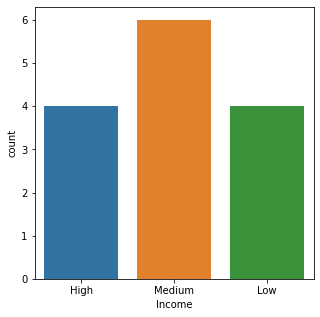

In [212]:
plt.figure(figsize=(5,5))
sns.countplot(data['Income'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

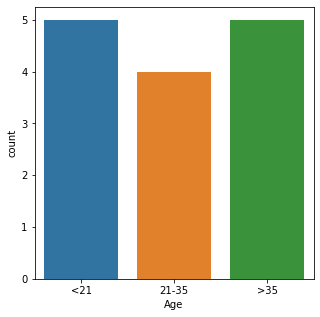

In [213]:
plt.figure(figsize=(5,5))
sns.countplot(data['Age'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

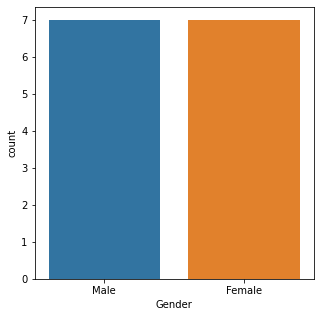

In [20]:
plt.figure(figsize=(5,5))
sns.countplot(data['Gender'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital status', ylabel='count'>

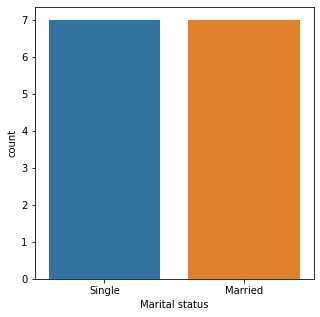

In [22]:
plt.figure(figsize=(5,5))
sns.countplot(data['Marital status'])

# checking of Balance data 

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Buys', ylabel='count'>

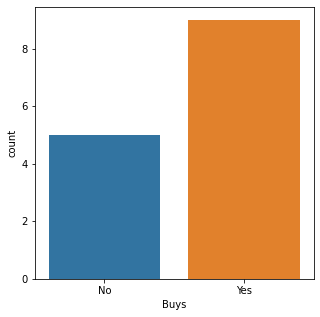

In [23]:
plt.figure(figsize=(5,5))
sns.countplot(data['Buys'])

# 
Here we can say that count of buys cosmetics is greater than not buying.


here buys is our target variable and praprotion of both is not balance it may be possible that data is imbalance in some extend
64 % data in yes category and remaining in no category.


# Preproccesing

In [218]:
# convert categorical data into numerical data


from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data=data.apply(label.fit_transform)

In [219]:
print(data)

    Age  Income  Gender  Marital status  Buys
0     1       0       1               1     0
1     1       0       1               0     0
2     0       0       1               1     1
3     2       2       1               1     1
4     2       1       0               1     1
5     2       1       0               0     0
6     0       1       0               0     1
7     1       2       1               1     0
8     1       1       0               0     1
9     2       2       0               1     1
10    1       2       0               0     1
11    0       2       1               0     1
12    0       0       0               1     1
13    2       2       1               0     0


# Independent and dependent variables

In [232]:
x=data.drop('Buys',axis=1)
y=data['Buys']

# split data into train and test data

In [233]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=12)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10, 4)
(4, 4)
(10,)
(4,)


# Build Model

In [234]:
#build decision tree model


from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=12)
classifier.fit(x,y)

DecisionTreeClassifier(criterion='entropy', random_state=12)

# Prediction from test data

In [225]:
y_pred=classifier.predict(x_test)

In [226]:
y_pred

array([0, 1, 1, 0])

# Prediction for given values of test data

In [81]:
x_test=np.array([1,1,0,0])


In [84]:

print(x_test,y_pred[0])

[1 1 0 0] Yes


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# for given data [Age < 21, Income = Low, Gender = Female, Marital Status = Married] prection is buying cosmetic 

# Model Evaluation

In [230]:
from sklearn.metrics import confusion_matrix,accuracy_score
con_m=confusion_matrix(y_test,y_pred)
con_m

array([[2, 0],
       [0, 2]], dtype=int64)

In [235]:
 accuracy_score(y_test,y_pred)
    

1.0

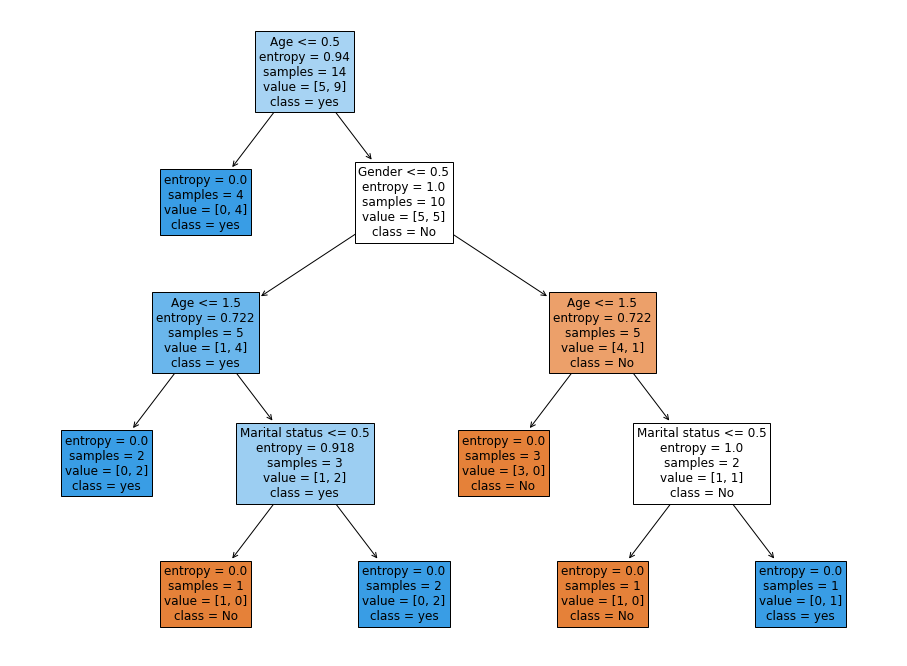

In [242]:
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,12))
a = plot_tree(classifier, feature_names=x.columns, fontsize=12, filled=True, 
              class_names=['No', 'yes'])

# Overall conclusion:
    from the conclusion matrix and accuracy score we can say that there all obseravtions are correctly predicted. But there might be possibility of overfitting due to some imbalace data

# Q1

# Import libraries

In [174]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset

In [175]:
data=pd.read_csv("data.csv")
data.head()

,F,N,Prprice per square foot
0,0.44,0.68,511.14
1,0.99,0.23,717.10
2,0.84,0.29,607.91
3,0.28,0.45,270.40
4,0.07,0.83,289.88


In [176]:
  data.shape               #to check number of rows and columns in data set

(100, 3)

In [177]:
data.info()                   #to check info about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   F                        100 non-null    float64
 1   N                        100 non-null    float64
 2   Prprice per square foot  100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [178]:
data.isnull().sum()                #to check missing values in data set 

F                          0
N                          0
Prprice per square foot    0
dtype: int64

In [179]:
data.describe()                 # statsistics about data

,F,N,Prprice per square foot
count,100.000000,100.000000,100.000000
mean,0.550300,0.501700,554.214600
std,0.293841,0.307124,347.312796
min,0.010000,0.000000,42.080000
25%,0.300000,0.230000,278.172500
50%,0.570000,0.485000,514.285000
75%,0.822500,0.760000,751.752500
max,1.000000,0.990000,1563.820000


# spliting data into independent and dependent values

In [269]:


x=data.iloc[:,0:2].values
y=data.iloc[:,-1].values


# Split data training and testing

In [259]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)


In [260]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(11, 2)
(3, 2)
(11,)
(3,)


# Building Model

# Here we build Multiple Linear Regression Model

In [187]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

# Predcition from test data

In [188]:
y_pred=reg.predict(x_test)

In [189]:
y_pred

array([ 588.07369916,  120.33916216,  966.54127275,  128.50634545,
        106.54037187, 1075.23670036,  758.44237575,  298.87308897,
        334.91614697,  887.13058812,  877.27430934,  706.90563275,
       1209.27822561,  607.78239057,  518.23713304,  -63.26398418,
        189.33118054,  116.39471757,   45.99769706,  586.3826706 ])

# Model evalution

In [192]:
from sklearn import metrics
r2=metrics.r2_score(y_test,y_pred)
mae=metrics.mean_absolute_error(y_test,y_pred)        #sum(y-ypred)
mse=metrics.mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("Coefficient of determination",r2)
print("Mean Abosolute error",mae)
print("Mean squared error",mse)
print("root mean squared error ",rmse)

Coefficient of determination 0.9493423546337852
Mean Abosolute error 67.77632755715629
Mean squared error 7429.798188852942
root mean squared error  86.19627711712927


# If we see r2 is good but error is larger so we try to fit another model polynomial regression for better accuracy and minimize the error

# Polynomial regression 

In [193]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(x_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression()

In [194]:
y_pred=lin_reg_2.predict(poly_reg.fit_transform(x_test))

In [195]:
y_pred

array([ 532.16362028,  171.12168287, 1022.63339082,  167.99843167,
        166.43863786, 1182.11024246,  732.44182106,  276.70542555,
        308.26134763,  901.15590292,  883.04529754,  635.67069616,
       1454.23552709,  513.63045574,  462.63787954,   95.72604483,
        206.47221364,  167.921077  ,  130.64356387,  521.79379931])

# Model evalution

In [196]:
from sklearn import metrics
r2=metrics.r2_score(y_test,y_pred)
mae=metrics.mean_absolute_error(y_test,y_pred)        #sum(y-ypred)
mse=metrics.mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("Coefficient of determination",r2)
print("Mean Abosolute error",mae)
print("Mean squared error",mse)
print("root mean squared error ",rmse)

Coefficient of determination 0.9997989696550821
Mean Abosolute error 4.364924196140193
Mean squared error 29.484491072922065
root mean squared error  5.429962345442376


# Overall conclusion :
    
    
    if we compare both the data set then accuracy for polynomial regression is better than multiple linear regression aslo mean absolute error also reduce much in case of polynomial resgression 
    
    so from the model we can suggest that anil has to choose polynomial regression for his prediction